# Part 1: 2D Convolution

### 1.Write a program for the image 2D convolution. It should be able to process any grayscale input image, and operate using the following kernels:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import random as rm
import math
import cv2

[[ 24  23  23 ...  28  29  30]
 [ 23  23  23 ...  29  30  32]
 [ 23  23  22 ...  30  30  32]
 ...
 [  6   6   6 ... 115 114 112]
 [ 13  13  12 ... 114 114 112]
 [  7   9   9 ... 112 112 110]]


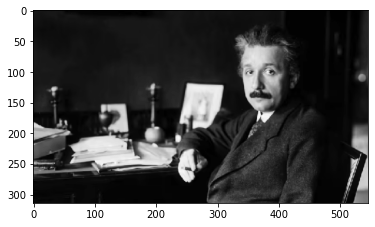

In [2]:
# import and show the image
img = cv2.imread('einstein.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img,plt.cm.gray)
print(img)
img_sz=img.shape

In [3]:
# pascal function : for computing sobel kernel
def pascal(k,n):
    if k >= 0 and k <= n:
        y = math.factorial(n)/(math.factorial(n-k)*math.factorial(k))
    else:
        y=0
    return y

In [4]:
# kernels
#sobel
def sobel(order): 
    sobel_x=np.zeros([order,order])
    smooth=np.zeros([order,1])
    diff=np.zeros([order,1])
    for j in range(0,order):
        smooth=pascal(j,order-1)
#         print(smooth)
        for k in range(0,order):
            diff=pascal(k,order-2)-pascal(k-1,order-2)
#             print(diff)
            sobel_x[j][k]=smooth*diff
            
    sobel_y=-1*sobel_x.T
    return sobel_x,sobel_y
#print(sobel_x,'\n',sobel_y)

In [5]:
# convolution for sobel kernel, 2 kernel in 2 directions
def convolution_2(img,kernel1,kernel2):
    sz_img=img.shape
    sz_kernel=kernel1.shape
    #[a,b]=sz_kernel
    
    a=int((sz_kernel[0]-1)/2)
    b=int((sz_kernel[1]-1)/2)
    
    pimg=np.zeros(sz_img)
    for j in range(a,(sz_img[0]-a)):
        for k in range(b,(sz_img[1]-b)):
            for i in range(0,2):
                ximg=np.sum(img[j-a:j+a+1,k-b:k+b+1]*kernel1)
                yimg=np.sum(img[j-a:j+a+1,k-b:k+b+1]*kernel2)
                pimg[j][k]=np.abs(ximg)+np.abs(yimg)
    
    return pimg
            

[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]] 
 [[-1. -2. -1.]
 [-0. -0. -0.]
 [ 1.  2.  1.]]


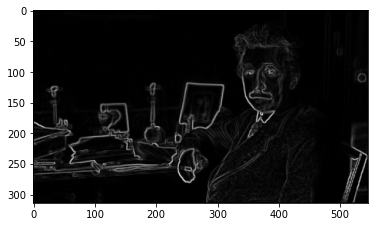

In [6]:
# when mask size is 3, ploting the Sobel kenerl processed image
[sobel_x,sobel_y]=sobel(3)
print(sobel_x,'\n',sobel_y)
sobel_img = convolution_2(img,sobel_x,sobel_y)
#sobel_x_img=np.uint8(sobel_x_img)
plt.imshow(sobel_img,plt.cm.gray)
# print(sobel_x_img)

[[   1.    6.   14.   14.    0.  -14.  -14.   -6.   -1.]
 [   8.   48.  112.  112.    0. -112. -112.  -48.   -8.]
 [  28.  168.  392.  392.    0. -392. -392. -168.  -28.]
 [  56.  336.  784.  784.    0. -784. -784. -336.  -56.]
 [  70.  420.  980.  980.    0. -980. -980. -420.  -70.]
 [  56.  336.  784.  784.    0. -784. -784. -336.  -56.]
 [  28.  168.  392.  392.    0. -392. -392. -168.  -28.]
 [   8.   48.  112.  112.    0. -112. -112.  -48.   -8.]
 [   1.    6.   14.   14.    0.  -14.  -14.   -6.   -1.]] 
 [[  -1.   -8.  -28.  -56.  -70.  -56.  -28.   -8.   -1.]
 [  -6.  -48. -168. -336. -420. -336. -168.  -48.   -6.]
 [ -14. -112. -392. -784. -980. -784. -392. -112.  -14.]
 [ -14. -112. -392. -784. -980. -784. -392. -112.  -14.]
 [  -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.]
 [  14.  112.  392.  784.  980.  784.  392.  112.   14.]
 [  14.  112.  392.  784.  980.  784.  392.  112.   14.]
 [   6.   48.  168.  336.  420.  336.  168.   48.    6.]
 [   1.    8.   28.   56.   

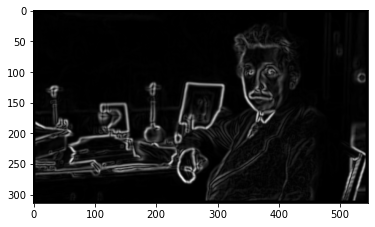

In [7]:
# when mask size is 9, ploting the Sobel kenerl processed image
[sobel_x,sobel_y]=sobel(9)
print(sobel_x,'\n',sobel_y)
sobel_img = convolution_2(img,sobel_x,sobel_y)
#sobel_x_img=np.uint8(sobel_x_img)
plt.imshow(sobel_img,plt.cm.gray)
# print(sobel_x_img)

In [8]:
# convolution for Gaussian kernel
def convolution_1(img,kernel1):
    sz_img=img.shape
    sz_kernel=kernel1.shape
    #[a,b]=sz_kernel
    
    a=int((sz_kernel[0]-1)/2)
    b=int((sz_kernel[1]-1)/2)
    
    pimg=np.zeros(sz_img)
    for j in range(a,(sz_img[0]-a)):
        for k in range(b,(sz_img[1]-b)):
            for i in range(0,2):
                ximg=np.sum(img[j-a:j+a+1,k-b:k+b+1]*kernel1)
                #yimg=np.sum(img[j-a:j+a+1,k-b:k+b+1]*kernel2)
                pimg[j][k]=np.abs(ximg)
    
    return pimg
            

In [9]:
#kernel
#gaussian
def gaussian(x,y,delta):
    return 1/(2*math.pi*delta**2)*np.exp(-1*(x*x+y*y)/(2*delta**2))
def Gau(order):
    delta=0.3*((order-1)/2-1)+0.8
    a=int((order-1)/2)
    ga=np.zeros([order,order])
    for j in range(-a,a+1):
        for k in range(-a,a+1):
            ga[j][k]=gaussian(j,k,delta)
    
    return ga
# ga1=1/16*np.array([[1,2,1],[2,4,2],[1,2,1]])
# ga2=1/159*np.array([[2,4,5,4,2],[4,9,12,9,4],[5,12,15,12,5],[4,9,12,9,4],[2,4,5,4,2]])

[[0.2486796  0.11385382 0.11385382]
 [0.11385382 0.05212608 0.05212608]
 [0.11385382 0.05212608 0.05212608]]


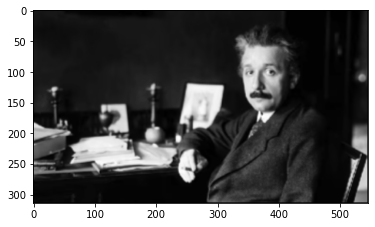

In [10]:
# when mask size is 3, ploting the Gaussian kenerl processed image
ga1=Gau(3)
print(ga1)
gaussian_img = convolution_1(img,ga1)
#sobel_x_img=np.uint8(sobel_x_img)
plt.imshow(gaussian_img,plt.cm.gray)
#print(sobel_x_img)

[[0.05507091 0.04632174 0.02756592 0.01160607 0.00345719 0.00345719
  0.01160607 0.02756592 0.04632174]
 [0.04632174 0.03896255 0.02318649 0.0097622  0.00290794 0.00290794
  0.0097622  0.02318649 0.03896255]
 [0.02756592 0.02318649 0.01379821 0.00580945 0.00173051 0.00173051
  0.00580945 0.01379821 0.02318649]
 [0.01160607 0.0097622  0.00580945 0.00244595 0.00072859 0.00072859
  0.00244595 0.00580945 0.0097622 ]
 [0.00345719 0.00290794 0.00173051 0.00072859 0.00021703 0.00021703
  0.00072859 0.00173051 0.00290794]
 [0.00345719 0.00290794 0.00173051 0.00072859 0.00021703 0.00021703
  0.00072859 0.00173051 0.00290794]
 [0.01160607 0.0097622  0.00580945 0.00244595 0.00072859 0.00072859
  0.00244595 0.00580945 0.0097622 ]
 [0.02756592 0.02318649 0.01379821 0.00580945 0.00173051 0.00173051
  0.00580945 0.01379821 0.02318649]
 [0.04632174 0.03896255 0.02318649 0.0097622  0.00290794 0.00290794
  0.0097622  0.02318649 0.03896255]]


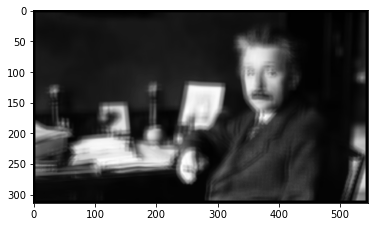

In [11]:
# when mask size is 9, ploting the Gaussian kenerl processed image
ga2=Gau(9)
print(ga2)
gaussian_img = convolution_1(img,ga2)
#sobel_x_img=np.uint8(sobel_x_img)
plt.imshow(gaussian_img,plt.cm.gray)
#print(sobel_x_img)

In [12]:
# Haar kernel
def Haar(order):
    block=np.ones([order,order]).astype(int)
    mask1=np.concatenate([-1*block,block],axis=0)
    mask2=np.concatenate([-1*block,block],axis=1)
    mask3=np.concatenate([block,-1*block,block],axis=0)
    mask4=np.concatenate([block,-1*block,block],axis=1)
    mask5=np.concatenate([mask1,-1*mask1],axis=1)
    mask=[mask1,mask2,mask3,mask4,mask5]
    return mask

# 2D convolution for Haar kernel
def convolution_3(img,mask):
    sz_img=img.shape
    sz_kernel=mask.shape
    #[a,b]=sz_kernel
    
    a=int(sz_kernel[0])
    b=int(sz_kernel[1])
    
    pimg=np.zeros(sz_img)
    for j in range(0,(sz_img[0]-a)):
        for k in range(0,(sz_img[1]-b)):
            for i in range(0,2):
                ximg=np.sum(img[j:j+a,k:k+b]*mask)
                #yimg=np.sum(img[j-a:j+a+1,k-b:k+b+1]*kernel2)
                pimg[j][k]=np.abs(ximg)
    
    return pimg
            

[array([[-1],
       [ 1]]), array([[-1,  1]]), array([[ 1],
       [-1],
       [ 1]]), array([[ 1, -1,  1]]), array([[-1,  1],
       [ 1, -1]])]


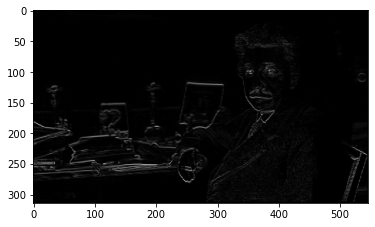

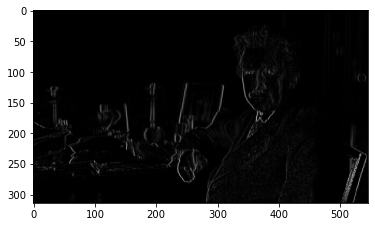

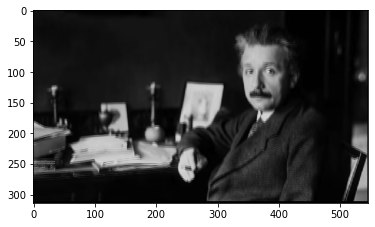

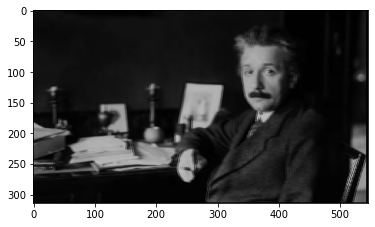

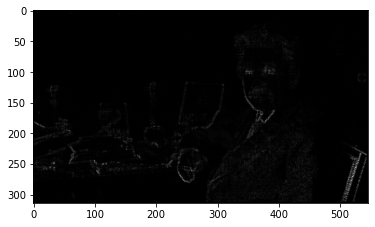

In [13]:
# when mask size is 1, ploting the Haar kenerl processed image
mask=Haar(1)
print(mask)
for ma in mask:
    Haar_img = convolution_3(img,ma)
    plt.imshow(Haar_img,plt.cm.gray)
    plt.show()
    

[array([[-1, -1],
       [-1, -1],
       [ 1,  1],
       [ 1,  1]]), array([[-1, -1,  1,  1],
       [-1, -1,  1,  1]]), array([[ 1,  1],
       [ 1,  1],
       [-1, -1],
       [-1, -1],
       [ 1,  1],
       [ 1,  1]]), array([[ 1,  1, -1, -1,  1,  1],
       [ 1,  1, -1, -1,  1,  1]]), array([[-1, -1,  1,  1],
       [-1, -1,  1,  1],
       [ 1,  1, -1, -1],
       [ 1,  1, -1, -1]])]


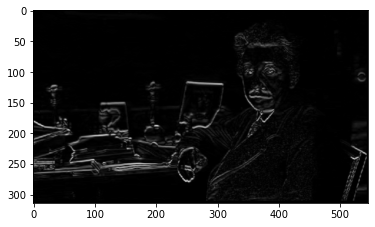

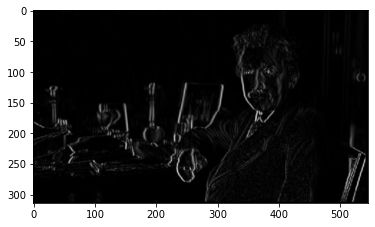

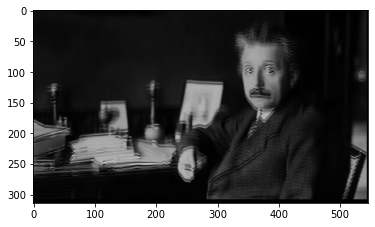

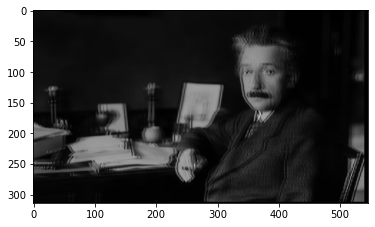

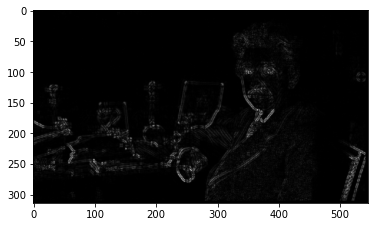

In [14]:
# when mask size is 2, ploting the Haar kenerl processed image
mask=Haar(2)
print(mask)
for ma in mask:
    Haar_img = convolution_3(img,ma)
    plt.imshow(Haar_img,plt.cm.gray)
    plt.show()
    

### 2.Show the results of the convolution with each of the kernels above on this image

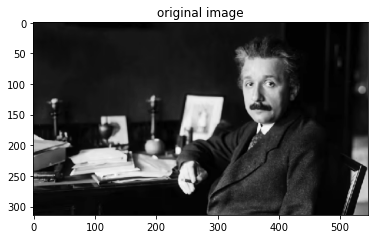

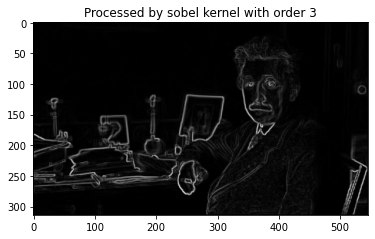

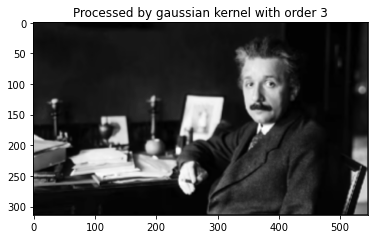

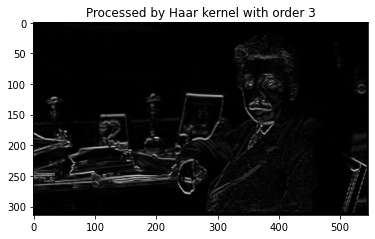

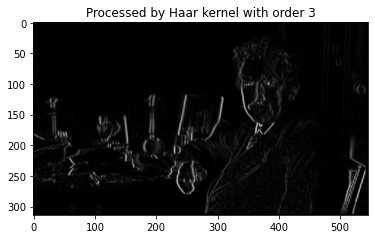

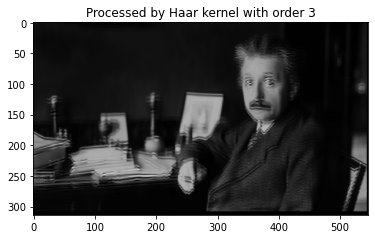

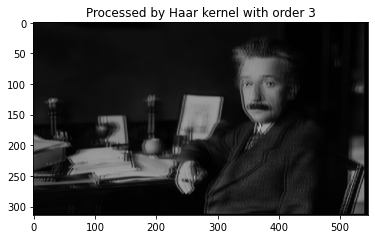

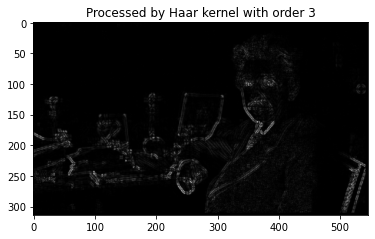

In [15]:
#original image
plt.imshow(img,plt.cm.gray)
plt.title("original image")
plt.show()

# order
k = int(3)

#sobel
[sobel_x,sobel_y]=sobel(k)
# print(sobel_x,'\n',sobel_y)
sobel_img = convolution_2(img,sobel_x,sobel_y)
#sobel_x_img=np.uint8(sobel_x_img)
plt.imshow(sobel_img,plt.cm.gray)
plt.title("Processed by sobel kernel with order %d"%k)
plt.show()
# print(sobel_x_img)

#gaussian
ga1=Gau(k)
# print(ga1)
gaussian_img = convolution_1(img,ga1)
#sobel_x_img=np.uint8(sobel_x_img)
plt.imshow(gaussian_img,plt.cm.gray)
plt.title("Processed by gaussian kernel with order %d"%k)
plt.show()
#print(sobel_x_img)

#Haar
mask=Haar(2)
# print(mask)
for ma in mask:
    Haar_img = convolution_3(img,ma)
    plt.imshow(Haar_img,plt.cm.gray)
    plt.title("Processed by Haar kernel with order %d"%k)
    plt.show()

### 3.Write your conclusions on the outputs of each of the kernels, and explain how the size of the kernel influences the outputs

### Sobel kernel extract the egde in the image; Gaussian kernel makes the image indistinct;  Different Haar masks' effect differ. Type1 ouput is like sobel which extract the edge. Type2 output is like gaussian which makes the image indistinct. Type3 looks like the combination of 2 ouputs in type1.

### the biger size of the kernel, the more strong effect of the kernel.